In [1]:
# complex networks package - guide https://networkx.org/ 
import networkx as nx

# visualization packages - https://matplotlib.org/ 
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout

# n-dinsional array tool - https://numpy.org/ 
import numpy as np

import pygraphviz

import matplotlib.colors as mcolors

import scipy

# for Notebook
%matplotlib inline

In [2]:
pip install networkx --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.4
    Uninstalling networkx-2.8.4:
      Successfully uninstalled networkx-2.8.4
Note: you may need to restart the kernel to use updated packages.


In [3]:
#nx.__version__

scipy.__version__

'1.8.0'

In [4]:
#A clean way to migrate numpy arrays to latex bmatrix. It should work for both 2d arrays and horizontal and vertical 1d array.

def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

A = np.array([[12, 5, 2], [20, 4, 8], [ 2, 4, 3], [ 7, 1, 10]])
print(bmatrix(A) + '\n')

#B = np.array([[1.2], [3.7], [0.2]])
#print bmatrix(B) + '\n'

#C = np.array([1.2, 9.3, 0.6, -2.1])
#print bmatrix(C) + '\n'

\begin{bmatrix}
  12 & 5 & 2\\
  20 & 4 & 8\\
  2 & 4 & 3\\
  7 & 1 & 10\\
\end{bmatrix}



# Centrality measures

### nx.degree_centrality(cam_net_mc)
### nx.eigenvector_centrality(cam_net_mc)
### nx.betweenness_centrality(cam_net_mc)
### nx.closeness_centrality(cam_net_mc)


## A nice way to showcase centrality

In [9]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    
    plt.axis('off')
    plt.show()

# Directed graphs example of Centrality

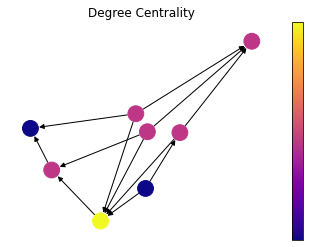

\begin{bmatrix}
  0 & 1 & 0 & 0 & 0 & 1 & 0 & 1\\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
  0 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0 & 1 & 1 & 0 & 0\\
  0 & 1 & 0 & 0 & 0 & 1 & 1 & 1\\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
\end{bmatrix}



/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_10220/2666765197.py:11: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  Adj_D=nx.adjacency_matrix(D);


In [8]:
D=nx.DiGraph()
Dnodes=['a','b','c','d','e','f','g','h','e']
Dedges=[('b','a'),('b','c'),('b','e'),('f','e'),('e','d'),('d','c'),('g','e'),('h','e'),('f','a'),('f','d'),('g','h'),('h','a')]
D.add_nodes_from(Dnodes)
D.add_edges_from(Dedges)

pos = nx.spring_layout(D, seed=675)
draw(D, pos, nx.degree_centrality(D), 'Degree Centrality') 
#draw(D, pos, nx.eigenvector_centrality(D), 'Eigenvector Centrality') 

Adj_D=nx.adjacency_matrix(D);
print(bmatrix(Adj_D.todense().T) + '\n')

#nx.eigenvector_centrality(D) 

#plt.plot(figsize=(10,12))
#nx.draw_circular(D,node_size=1400, with_labels=True, width=3, font_size =24, 
#    font_color='white')

In [10]:
u, s, vh = np.linalg.svd(Adj_D.todense().T, full_matrices=False)

### Example from Wikipedia

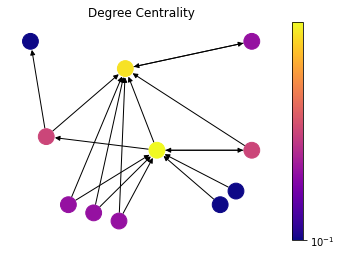

In [11]:
DiG = nx.DiGraph()
DiG.add_edges_from([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4),
                    (5, 6), (6, 2), (6, 5), (7, 2), (7, 5), (8, 2),
                    (8, 5), (9, 2), (9, 5), (10, 5), (11, 5)])
dpos = {1: [0.1, 0.9], 2: [0.4, 0.8], 3: [0.8, 0.9], 4: [0.15, 0.55],
        5: [0.5,  0.5], 6: [0.8,  0.5], 7: [0.22, 0.3], 8: [0.30, 0.27],
        9: [0.38, 0.24], 10: [0.7,  0.3], 11: [0.75, 0.35]}

draw(DiG, dpos, nx.degree_centrality(DiG), 'Degree Centrality')
#nx.eigenvector_centrality(DiG)

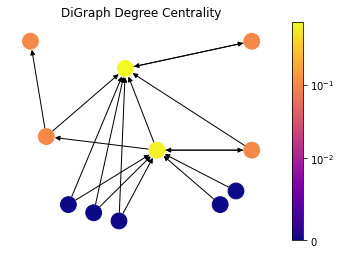

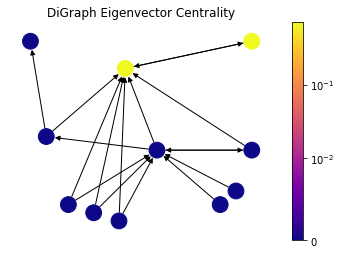

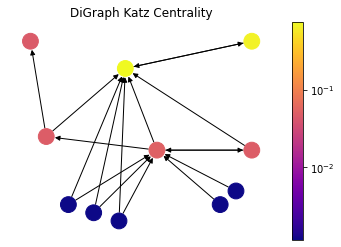

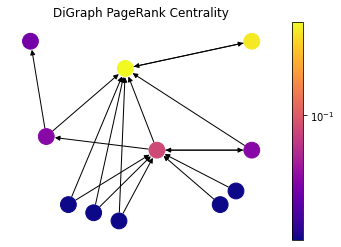

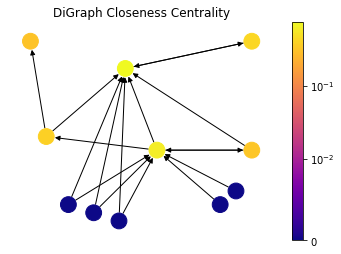

In [12]:
draw(DiG, dpos, nx.in_degree_centrality(DiG), 'DiGraph Degree Centrality')
draw(DiG, dpos, nx.eigenvector_centrality_numpy(DiG), 'DiGraph Eigenvector Centrality')
draw(DiG, dpos, nx.katz_centrality(DiG, alpha=0.9, beta=1.0), 'DiGraph Katz Centrality')
draw(DiG, dpos, nx.pagerank(DiG, alpha=0.85), 'DiGraph PageRank Centrality')
draw(DiG, dpos, nx.closeness_centrality(DiG), 'DiGraph Closeness Centrality')

# HITS centrality

/Users/wdaugherty/opt/anaconda3/envs/ECE5260/lib/python3.9/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


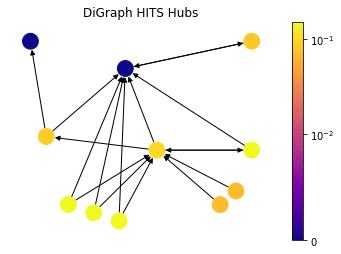

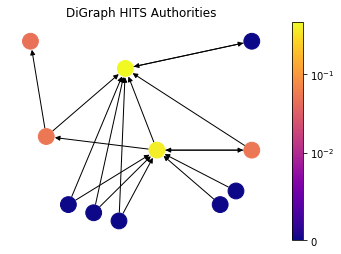

In [13]:
h,a = nx.hits(DiG)
draw(DiG, dpos, h, 'DiGraph HITS Hubs')
draw(DiG, dpos, a, 'DiGraph HITS Authorities')

# Zachary’s Karate Club graph centrality

### A social network of members of an university karate club, where undirected edges connects people who interact outside the club.

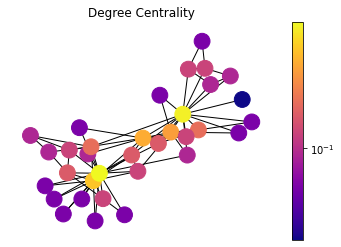

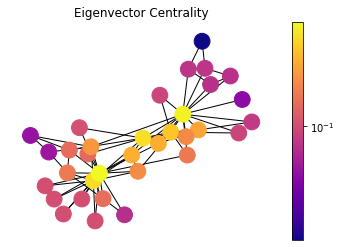

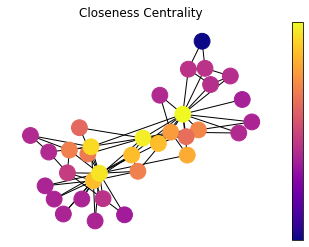

In [14]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=675)
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')


In [15]:
nx.transitivity(G)

0.2556818181818182

In [16]:
nx.clustering(G)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

In [17]:
nx.average_clustering(G)

0.5706384782076823

In [18]:
nx.degree_assortativity_coefficient(G)

-0.47561309768461413

In [19]:
nx.degree_pearson_correlation_coefficient(G)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


-0.47561309768461446

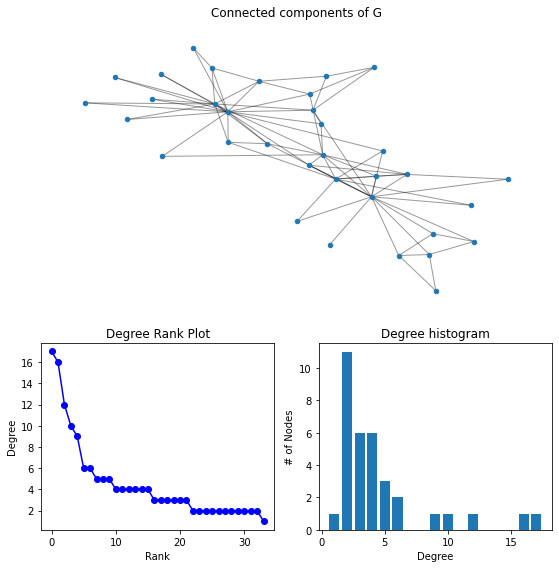

In [20]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

\begin{bmatrix}
  2 & -1 & 0 & 0 & -1\\
  -1 & 2 & -1 & 0 & 0\\
  0 & -1 & 2 & -1 & 0\\
  0 & 0 & -1 & 2 & -1\\
  -1 & 0 & 0 & -1 & 2\\
\end{bmatrix}

[-3.78332348e-16  1.57705974e-02  1.57705974e-02  6.28336777e-02
  6.28336777e-02  1.40447028e-01  1.40447028e-01  2.47386640e-01
  2.47386640e-01  3.81966011e-01  3.81966011e-01  5.42062745e-01
  5.42062745e-01  7.25152021e-01  7.25152021e-01  9.28346410e-01
  9.28346410e-01  1.14844142e+00  1.14844142e+00  1.38196601e+00
  1.38196601e+00  1.62523737e+00  1.62523737e+00  1.87441896e+00
  1.87441896e+00  2.12558104e+00  2.12558104e+00  2.37476263e+00
  2.37476263e+00  2.61803399e+00  2.61803399e+00  2.85155858e+00
  2.85155858e+00  3.07165359e+00  3.07165359e+00  3.27484798e+00
  3.27484798e+00  3.45793725e+00  3.45793725e+00  3.61803399e+00
  3.61803399e+00  3.75261336e+00  3.75261336e+00  3.85955297e+00
  3.85955297e+00  3.93716632e+00  3.93716632e+00  3.98422940e+00
  3.98422940e+00  4.00000000e+00]


<class 'networkx.utils.decorators.argmap'> compilation 40:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 40:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 40:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


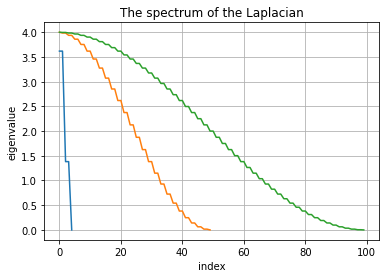

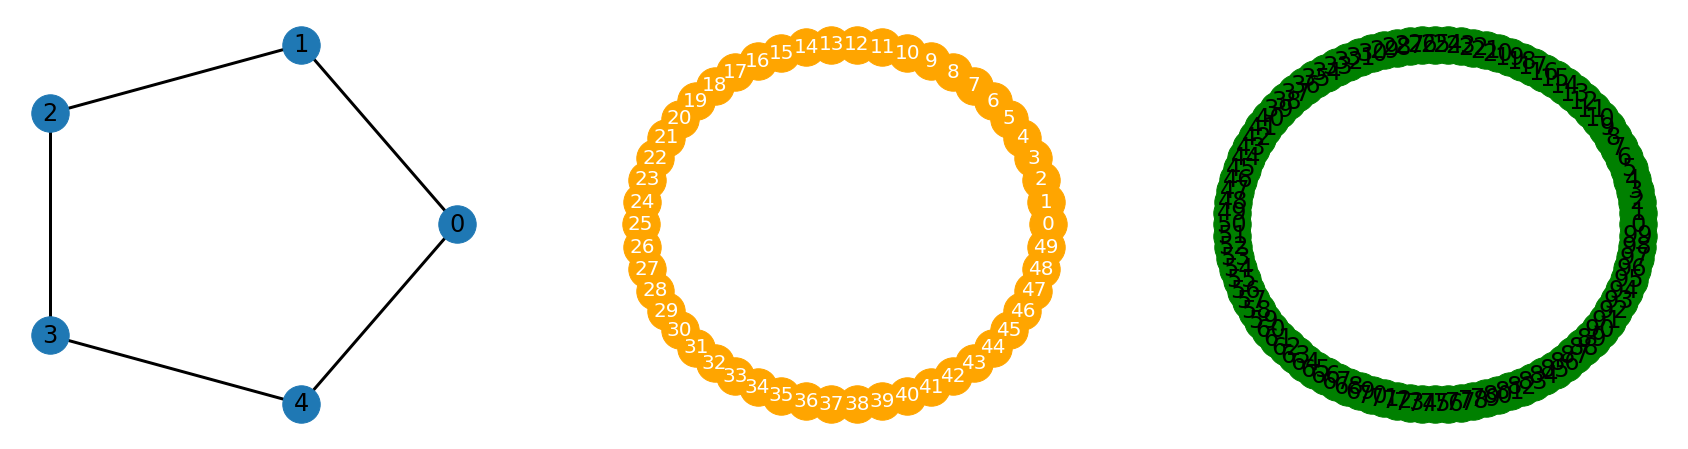

In [21]:
#specrtum of the graph
G1=nx.cycle_graph(5)
Lap_G1=nx.laplacian_matrix(G1)
eig_G1=np.linalg.eigvalsh(Lap_G1.todense())
print(bmatrix(Lap_G1.todense()) + '\n')
#plt.grid()
fig, ax = plt.subplots()
ax.plot(np.sort(eig_G1)[::-1])
G2=nx.cycle_graph(50)
Lap_G2=nx.laplacian_matrix(G2)
eig_G2=np.linalg.eigvalsh(Lap_G2.todense())
print(eig_G2)
ax.plot(np.sort(eig_G2)[::-1])
G3=nx.cycle_graph(100)
Lap_G3=nx.laplacian_matrix(G3)
eig_G3=np.linalg.eigvalsh(Lap_G3.todense())
#plt.yscale('logit')
ax.plot(np.sort(eig_G3)[::-1], label=['1','2','3'])
#ax.set_title('The spectrum of the Laplacian', fontsize=20)
ax.set(xlabel='index',ylabel='eigenvalue',
       title='The spectrum of the Laplacian')
ax.grid()

fig, axs = plt.subplots(1,3,figsize=(30,8))
#fig.suptitle('Undirected graph ${\cal G}$ and $L({\cal G})$')
nx.draw_circular(G1,node_size=1400, with_labels=True, width=3, font_size =24,ax=axs[0])
nx.draw_circular(G2,node_size=1400, node_color='orange', with_labels=True,font_color='white', width=3, font_size =20, ax=axs[1])
nx.draw_circular(G3,node_size=1400, node_color='green',with_labels=True, width=3, font_size =24, ax=axs[2])